*_BLOCK WEST_*

In [7]:
# Packages importieren

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Monte Carlo Simulation für _Block WEST_

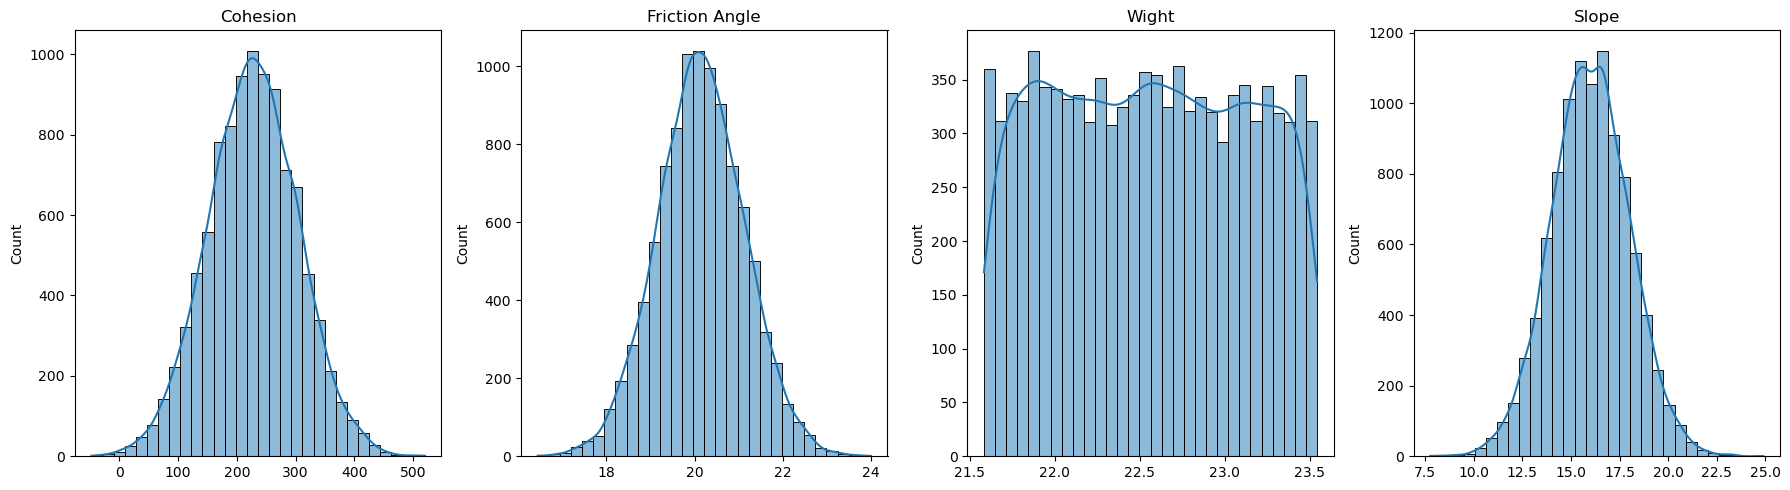

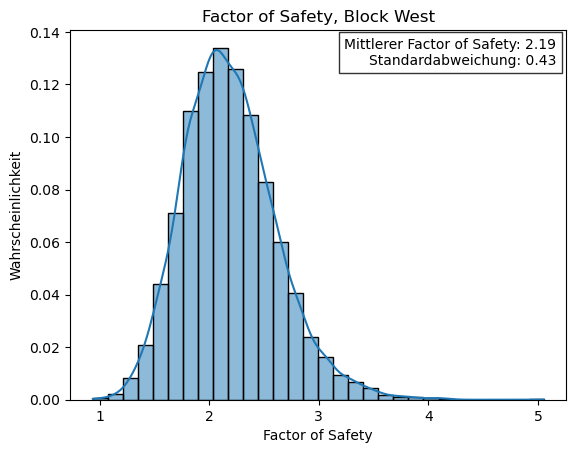

In [8]:
# Metaebene                 
g = 9.81   # Gravitation
runs = 10000


# Eingabe der Zufallsvariablen für die MC-Simulation

cohesion = np.random.normal(227.5, 77, runs)                         # Kohäsion [kPa]
friction_angle = np.random.normal(np.radians(20.16), np.radians(1), runs)  # Reibungswinkel [°]
wight = np.random.uniform(2200, 2400, runs) *g/1000                       # Dichte [kN/m³]     
slope = np.random.normal(np.radians(16), np.radians(2), runs)        # Neigung der Gleitfläche [°]


# Restliche Eingabeparameter

H = 42      # Höhe des Blocks [m]
A = 28.8    # Aufstandsfläche (=Breite)
U = 0       # Wasserdruck  ('Kraft U resultierend aus Porenwasserdruck ist am Hangfuss 0')
V = 0#np.random.triangular(0, (10*(1**2)*0.5), (10*(H**2)*0.5), runs)        # Horizontaler Wasserdruck


# Berechnungen aus den Eingabeparametern

Vol = A * H   # Aufstandsfläche * Höhe
W = wight * Vol   # Wichte [kN/m³]W

# Visualisierung der Zufallsvariablen

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.histplot(cohesion, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Cohesion')

sns.histplot(np.rad2deg(friction_angle), bins=30, kde=True, ax=axes[1])
axes[1].set_title('Friction Angle')

sns.histplot(wight, bins=30, kde=True, ax=axes[2])
axes[2].set_title('Wight')

sns.histplot(np.rad2deg(slope), bins=30, kde=True, ax=axes[3])
axes[3].set_title('Slope')

plt.tight_layout()
plt.show()

df = pd.DataFrame({'cohesion': cohesion, 'friction_angle': friction_angle, 'wight': wight, 'slope': slope})


# Factor of Safety berechnen

Fs = cohesion*A+(W*np.cos(slope)-U-V*np.sin(slope))*np.tan(friction_angle)
Fd = W*np.sin(slope)+V*np.cos(slope)

FoS = Fs / Fd


sns.histplot(FoS, bins=30, kde=True, stat="probability")
plt.xlabel('Factor of Safety')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Factor of Safety, Block West')
plt.gca().text(0.98, 0.98,
    f'Mittlerer Factor of Safety: {FoS.mean():.2f}\nStandardabweichung: {FoS.std():.2f}',
    ha='right', va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

Sensitivitätsanalyse Block West

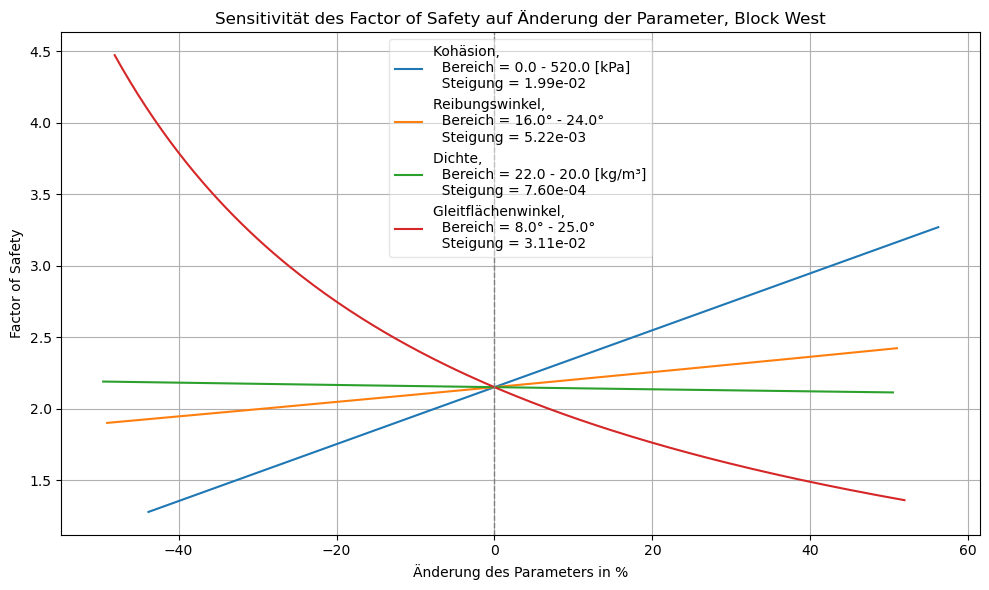

In [9]:
# Define ranges for each parameter
cohesion_min, cohesion_max = 0, cohesion.max() # cohesion_min kann auch auf cohesion.min() gesetzt werden, wenn cohesion.min() > 0
friction_angle_min, friction_angle_max = friction_angle.min(), friction_angle.max()
density_min, density_max = wight.min(), wight.max()
slope_min, slope_max = slope.min(), slope.max()

# Cohesion
cohesion_range = np.linspace(cohesion_min, cohesion_max, 200)
cohesion_pct = 100 * (cohesion_range - cohesion.mean()) / (cohesion_max - cohesion_min)  # percent change from mean
W = wight.mean() * Vol
Fs = cohesion_range * A + (W * np.cos(slope.mean()) - U - V * np.sin(slope.mean())) * np.tan(friction_angle.mean())
Fd = W * np.sin(slope.mean()) + V * np.cos(slope.mean())
FS_cohesion = Fs / Fd

# Friction angle
friction_angle_range = np.linspace(friction_angle_min, friction_angle_max, 200)
friction_angle_pct = 100 * (friction_angle_range - friction_angle.mean()) / (friction_angle_max - friction_angle_min)
Fs = cohesion.mean() * A + (W * np.cos(slope.mean()) - U - V * np.sin(slope.mean())) * np.tan(friction_angle_range)
Fd = W * np.sin(slope.mean()) + V * np.cos(slope.mean())
FS_friction = Fs / Fd

# Density
density_range = np.linspace(density_min, density_max, 200)
density_pct = 100 * (density_range - wight.mean()) / (density_max - density_min)
W_range = density_range * Vol
Fs = cohesion.mean() * A + (W_range * np.cos(slope.mean()) - U - V * np.sin(slope.mean())) * np.tan(friction_angle.mean())
Fd = W_range * np.sin(slope.mean()) + V * np.cos(slope.mean())
FS_density = Fs / Fd

# Slope
slope_range = np.linspace(slope_min, slope_max, 200)
slope_pct = 100 * (slope_range - slope.mean()) / (slope_max - slope_min)
Fs = cohesion.mean() * A + (W * np.cos(slope_range) - U - V * np.sin(slope_range)) * np.tan(friction_angle.mean())
Fd = W * np.sin(slope_range) + V * np.cos(slope_range)
FS_slope = Fs / Fd

# Legende
Ber_coh = f'{cohesion_range.min().round(-1)} - {cohesion_range.max().round(-1)}'
Aend_coh_unform = (FS_cohesion.max() - FS_cohesion.min())/(cohesion_pct.max() - cohesion_pct.min())
Aend_coh = '{:.2e}'.format(Aend_coh_unform)

Ber_fri = f'{np.rad2deg(friction_angle_range.min()).round()}° - {np.rad2deg(friction_angle_range.max()).round()}'
Aend_fri_unform = (FS_friction.max() - FS_friction.min())/(friction_angle_pct.max() - friction_angle_pct.min())
Aend_fri= '{:.2e}'.format(Aend_fri_unform)

Ber_den =  f'{density_range.min().round(0)} - {density_range.max().round(-1)}'
Aend_den_unform = (FS_density.max() - FS_density.min())/(density_pct.max() - density_pct.min())
Aend_den = '{:.2e}'.format(Aend_den_unform)

Ber_slo = f'{np.rad2deg(slope_range.min()).round()}° - {np.rad2deg(slope_range.max()).round()}°'
Aend_slo_unform = (FS_slope.max() - FS_slope.min())/(slope_pct.max() - slope_pct.min())
Aend_slo = '{:.2e}'.format(Aend_slo_unform)


# Plot all in one graph
plt.figure(figsize=(10, 6))
plt.plot(cohesion_pct, FS_cohesion, label= f'Kohäsion, \n  Bereich = {Ber_coh} [kPa] \n  Steigung = {Aend_coh}')
plt.plot(friction_angle_pct, FS_friction, label= f'Reibungswinkel, \n  Bereich = {Ber_fri}° \n  Steigung = {Aend_fri}')
plt.plot(density_pct, FS_density, label= f'Dichte, \n  Bereich = {Ber_den} [kg/m³]\n  Steigung = {Aend_den}')
plt.plot(slope_pct, FS_slope, label= f'Gleitflächenwinkel, \n  Bereich = {Ber_slo}\n  Steigung = {Aend_slo}')
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Änderung des Parameters in %')
plt.ylabel('Factor of Safety')
plt.title('Sensitivität des Factor of Safety auf Änderung der Parameter, Block West')
plt.legend(framealpha=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()